[[3. 3. 1. 1. 0.]
 [1. 0. 3. 2. 2.]
 [2. 2. 2. 2. 2.]
 [1. 3. 1. 2. 3.]
 [2. 3. 0. 1. 0.]]


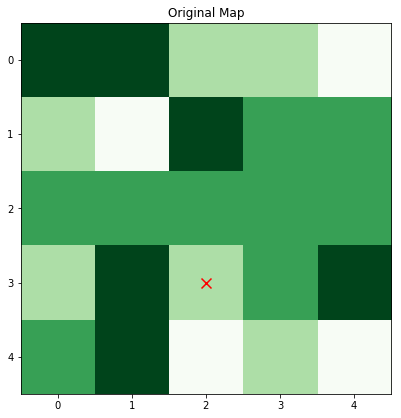

In [3]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from matplotlib import cm
import random
import matplotlib.gridspec as gridspec


dim = 5

# Generates the terrain and values for the map
def generateMap(dim):
        map = np.zeros([dim, dim])
        for i in range(dim):
            for j in range(dim):
                p = np.random.rand()
                if p <= 0.2:
                    map[i][j] = 0
                elif p > 0.2 and p <= 0.5:
                    map[i][j] = 1
                elif p > 0.5 and p <= 0.8:
                    map[i][j] = 2
                else:
                    map[i][j] = 3
        return map

# Generates the coordinates of the target marker
def generateTargetMarker(dim):
    x = np.random.randint(dim)
    y = np.random.randint(dim)
    return (x, y)

map = generateMap(dim)
target = generateTargetMarker(dim)
print(map)
grid = gridspec.GridSpec(ncols=2, nrows=2)
# Make a grid of 4 equal parts
fig = plt.figure(figsize=(15,15))
ogMap = fig.add_subplot(grid[0, 0])
Image = ogMap.imshow(map, cmap = cm.get_cmap('Greens', 4))
ogMap.set_title("Original Map")
ogMap.scatter(target[0], target[1], s=100, c='red', marker='x')
